In [1]:
#@Author: Anirban Dutta
#@Date: 11.04.2022

import numpy as np
import keras
import keras.backend as k
from keras.layers import Conv2D,MaxPooling2D,SpatialDropout2D,Flatten,Dropout,Dense
from keras.models import Sequential,load_model
from keras.preprocessing import image
import cv2
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
import os

In [2]:
path = 'train/'
categories = ['Smoking','NotSmoking']

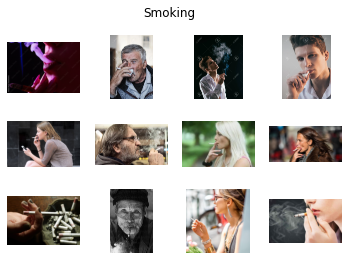

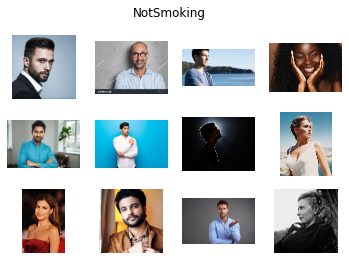

In [3]:
for category in categories:
    fig, _ = plt.subplots(3,4)
    fig.suptitle(category)
    for k, v in enumerate(os.listdir(path+category)[:12]):
        img = plt.imread(path+category+'/'+v)
        plt.subplot(3, 4, k+1)
        plt.axis('off')
        plt.imshow(img)
    plt.show()

In [4]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D() )
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D() )
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D() )
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [5]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [6]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
training_set = train_datagen.flow_from_directory(
        'train',
        target_size=(150,150),
        batch_size=16 ,
        class_mode='binary')

Found 314 images belonging to 2 classes.


In [7]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
        'test',
        target_size=(150,150),
        batch_size=16,
        class_mode='binary')

Found 237 images belonging to 2 classes.


In [8]:
model_saved=model.fit_generator(
        training_set,
        epochs=10,
        validation_data=test_set,

        )

model.save('smokerDetection.h5',model_saved)

C:\Users\ANIRBA~1\AppData\Local\Temp/ipykernel_20064/3938903147.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_saved=model.fit_generator(


Epoch 1/10
20/20 [==============================] - 15s 732ms/step - loss: 0.6780 - accuracy: 0.6943 - val_loss: 0.7645 - val_accuracy: 0.4430
Epoch 2/10
20/20 [==============================] - 11s 573ms/step - loss: 0.5931 - accuracy: 0.7006 - val_loss: 0.6532 - val_accuracy: 0.6498
Epoch 3/10
20/20 [==============================] - 11s 570ms/step - loss: 0.5604 - accuracy: 0.7038 - val_loss: 0.6455 - val_accuracy: 0.6667
Epoch 4/10
20/20 [==============================] - 11s 560ms/step - loss: 0.5410 - accuracy: 0.7166 - val_loss: 0.6663 - val_accuracy: 0.6498
Epoch 5/10
20/20 [==============================] - 11s 548ms/step - loss: 0.5098 - accuracy: 0.7707 - val_loss: 0.6609 - val_accuracy: 0.6624
Epoch 6/10
20/20 [==============================] - 11s 563ms/step - loss: 0.4848 - accuracy: 0.7771 - val_loss: 0.6295 - val_accuracy: 0.6667
Epoch 7/10
20/20 [==============================] - 11s 564ms/step - loss: 0.4533 - accuracy: 0.7866 - val_loss: 0.7647 - val_accuracy: 0.6540

In [23]:
mymodel=load_model('smokerDetection.h5')
cap=cv2.VideoCapture(0)
face_cascade=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

while cap.isOpened():
    _,img=cap.read()
    face=face_cascade.detectMultiScale(img,scaleFactor=1.1,minNeighbors=4)
    for(x,y,w,h) in face:
        face_img = img[y:y+h, x:x+w]
        cv2.imwrite('temp.jpg',face_img)
        test_image=image.load_img('temp.jpg',target_size=(150,150,3))
        test_image=image.img_to_array(test_image)
        test_image=np.expand_dims(test_image,axis=0)
        pred = mymodel.predict(test_image)[0][0]
        if pred==1:
            cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),3)
            cv2.putText(img,'NonSmoking',((x+w)//2,y+h+20),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),3)
        else:
            cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),3)
            cv2.putText(img,'Smoking',((x+w)//2,y+h+20),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),3)
        datet=str(datetime.datetime.now())
        cv2.putText(img,datet,(400,450),cv2.FONT_HERSHEY_SIMPLEX,0.5,(255,255,255),1)
          
    cv2.imshow('img',img)
    
    if cv2.waitKey(1)==ord('q'):
        break
    
cap.release()
cv2.destroyAllWindows()